In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from lab_lib import *


In [2]:
def make_plot_with_2mnk(file, title, xlabel, ylabel, x, y, dx, dy, k_b1, k_b2):

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (10,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    #plt.errorbar(x, y, "or", markersize = 9, label = 'Экспериментальные значения')
    plt.errorbar(x, y, xerr = dx, yerr = dy, fmt='.r', label = 'Экспериментальные значения')
    #plt.plot(x, y, "+b", label = "Экспериментальные данные", linewidth = 1)

    line1_x, line1_y = mnk_line_get_points(x, y, dx, dy, k_b1)
    line2_x, line2_y = mnk_line_get_points(x, y, dx, dy, k_b2)

    plt.plot(line1_x, line1_y, "b", label = r"Касательная макс $\mu_{диф_{нач}}$")
    plt.plot(line2_x, line2_y, "g", label = r"Касательная $\mu_{диф_{макс}}$")

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("{}".format(file))
    plt.show()


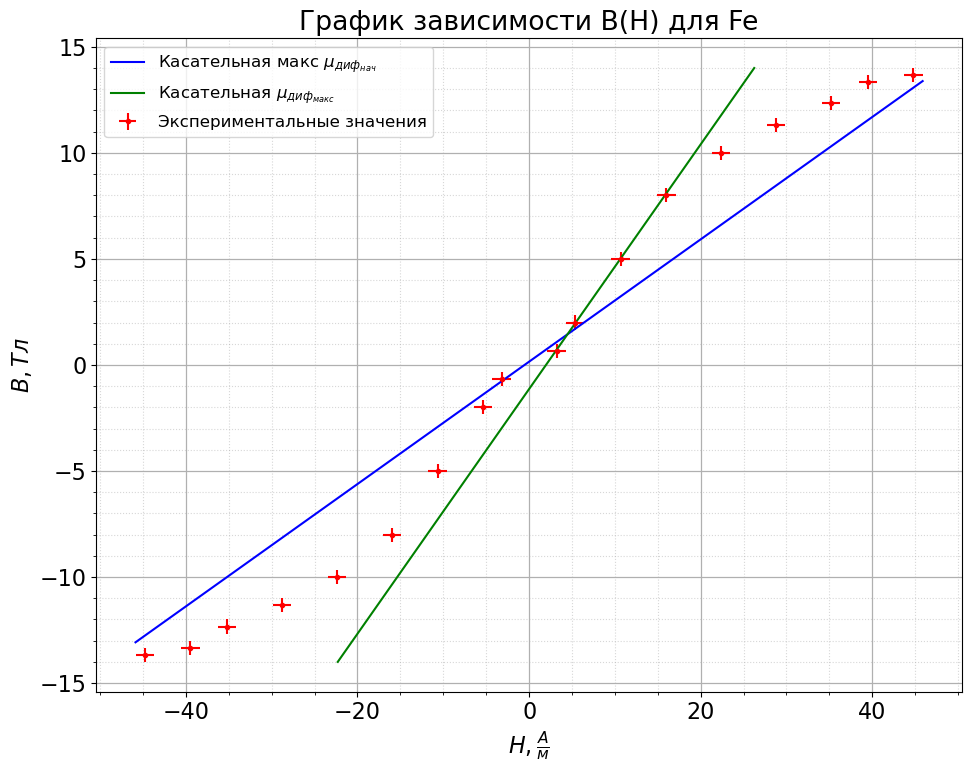

In [3]:
def Fe():
    raw_data = [[[i[0], 0.2], [i[1], 0.2], [i[2], 0.01]] for i in pd.read_csv("data/Ferrit.csv").to_numpy()]
    raw_data.sort()

    K_x = 0.02
    K_y = 0.01

    N_0 = 40
    twoPiR = 0.25
    R_0 = 0.3
    H_k = K_x * N_0 / (twoPiR * R_0)

    R_u = 20 * 10**3
    C_u = 20 * 10**-6
    S = 3 * 10**-4
    N_u = 400

    B_k = R_u * C_u / (S * N_u)

    data = []
    for i in raw_data:
        H = countWithSigma(H_k * i[0][0] / 2, [i[0]])
        B = countWithSigma(B_k * i[1][0] / 2, [i[1]])
        data.append([H, B, i[2]])

    plot_data = data.copy()
    for i in data:
        plot_data.append([[-i[0][0], i[0][1]], [-i[1][0], i[1][1]], [-i[2][0], i[2][1]]])
    plot_data.sort()

    H_max = data[-1][0]
    B_s   = data[-1][1]

    raw_c = [[1.2, 0.2], [3.2, 0.2]]
    H_c = countWithSigma(H_k * raw_c[0][0] / 2, [raw_c[0]])
    B_r = countWithSigma(B_k * raw_c[1][0] / 2, [raw_c[1]])

    k_b_beg = mnk([i[0][0] for i in plot_data[len(plot_data)//2-1:len(plot_data)//2+2]], [i[1][0] for i in plot_data[len(plot_data)//2-1:len(plot_data)//2+2]])
    k_b_max = [[0, 0], [0, 0]]
    for i in range(len(data)-3):
        k_b_ = mnk([i[0][0] for i in data[i:i+3]],  [i[1][0] for i in data[i:i+3]])
        if k_b_max[0][0] <= k_b_[0][0]:
            k_b_max = k_b_

    make_plot_with_2mnk("img/plot_Fe.png", r"График зависимости B(H) для Fe", r"$H, \frac{А}{м}$", r"$B, Тл$",
                        [i[0][0] for i in plot_data], [i[1][0] for i in plot_data],
                        [i[0][1] for i in plot_data], [i[1][1] for i in plot_data],
                        k_b_beg, k_b_max)

    mu_diff_beg = k_b_beg[0]
    mu_diff_max = k_b_max[0]

    ans_col = ["Fe", texAns(data[-1][2]), K_x, K_y,"%0.1f" % H_k, "%0.1f" % B_k, texAns(H_max), texAns(B_s), texAns(H_c), texAns(B_r), texAns(mu_diff_beg), texAns(mu_diff_max)]
    return ans_col

ans_Fe = Fe()




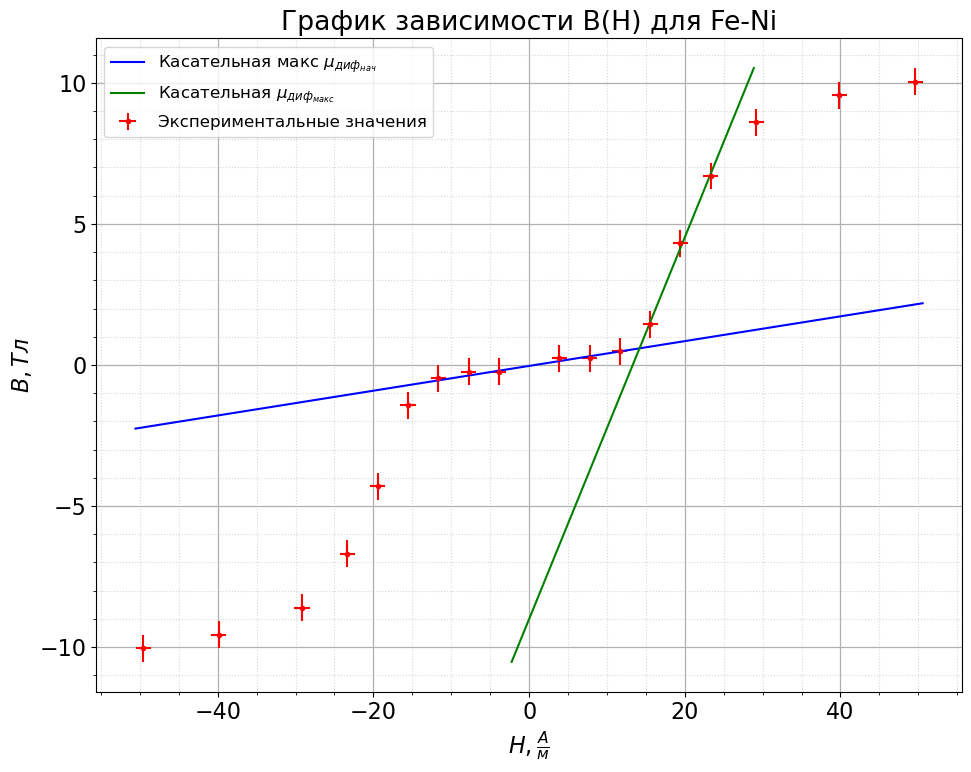

In [4]:
def FeNi():
    raw_data = [[[i[0], 0.2], [i[1], 0.2], [i[2], 0.01]] for i in pd.read_csv("data/FeNi.csv").to_numpy()]
    raw_data.sort()

    K_x = 0.02
    K_y = 0.1

    N_0 = 35
    twoPiR = 0.24
    R_0 = 0.3
    H_k = K_x * N_0 / (twoPiR * R_0)

    R_u = 20 * 10**3
    C_u = 20 * 10**-6
    S = 3.8 * 10**-4
    N_u = 220

    B_k = R_u * C_u / (S * N_u)

    data = []
    for i in raw_data:
        H = countWithSigma(H_k * i[0][0] / 2, [i[0]])
        B = countWithSigma(B_k * i[1][0] / 2, [i[1]])
        data.append([H, B, i[2]])

    plot_data = data.copy()
    for i in data:
        plot_data.append([[-i[0][0], i[0][1]], [-i[1][0], i[1][1]], [-i[2][0], i[2][1]]])
    plot_data.sort()

    H_max = data[-1][0]
    B_s   = data[-1][1]

    raw_c = [[1.2, 0.2], [3.2, 0.2]]
    H_c = countWithSigma(H_k * raw_c[0][0] / 2, [raw_c[0]])
    B_r = countWithSigma(B_k * raw_c[1][0] / 2, [raw_c[1]])

    k_b_beg = mnk([i[0][0] for i in plot_data[len(plot_data)//2-1:len(plot_data)//2+2]], [i[1][0] for i in plot_data[len(plot_data)//2-1:len(plot_data)//2+2]])
    k_b_max = [[0, 0], [0, 0]]
    for i in range(len(data)-3):
        k_b_ = mnk([i[0][0] for i in data[i:i+3]],  [i[1][0] for i in data[i:i+3]])
        if k_b_max[0][0] <= k_b_[0][0]:
            k_b_max = k_b_

    make_plot_with_2mnk("img/plot_FeNi.png", r"График зависимости B(H) для Fe-Ni", r"$H, \frac{А}{м}$", r"$B, Тл$",
                        [i[0][0] for i in plot_data], [i[1][0] for i in plot_data],
                        [i[0][1] for i in plot_data], [i[1][1] for i in plot_data],
                        k_b_beg, k_b_max)

    mu_diff_beg = k_b_beg[0]
    mu_diff_max = k_b_max[0]
    ans_col = ["Fe-Ni", texAns(data[-1][2]), K_x, K_y,"%0.1f" % H_k, "%0.1f" % B_k, texAns(H_max), texAns(B_s), texAns(H_c), texAns(B_r), texAns(mu_diff_beg), texAns(mu_diff_max)]
    return ans_col

ans_FeNi = FeNi()

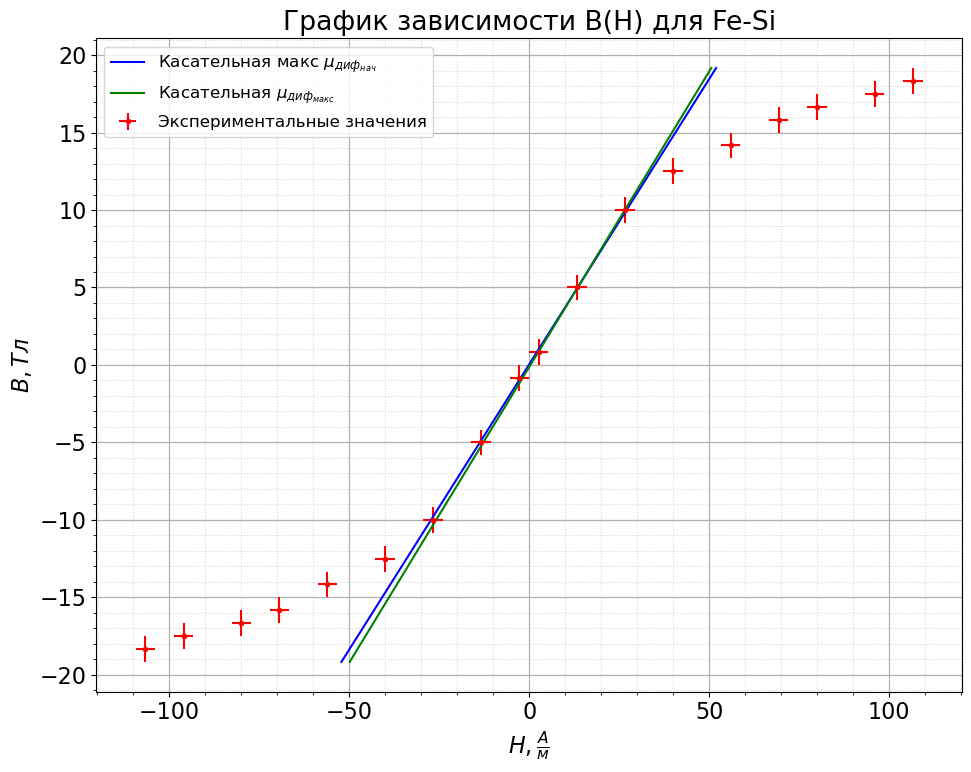

In [5]:
def FeSi():
    raw_data = [[[i[0], 0.2], [i[1], 0.2], [i[2], 0.01]] for i in pd.read_csv("data/FeSi.csv").to_numpy()]
    raw_data.sort()

    K_x = 0.02
    K_y = 0.01

    N_0 = 40
    twoPiR = 0.1
    R_0 = 0.3
    H_k = K_x * N_0 / (twoPiR * R_0)

    R_u = 20 * 10**3
    C_u = 20 * 10**-6
    S = 1.2 * 10**-4
    N_u = 400

    B_k = R_u * C_u / (S * N_u)

    data = []
    for i in raw_data:
        H = countWithSigma(H_k * i[0][0] / 2, [i[0]])
        B = countWithSigma(B_k * i[1][0] / 2, [i[1]])
        data.append([H, B, i[2]])

    plot_data = data.copy()
    for i in data:
        plot_data.append([[-i[0][0], i[0][1]], [-i[1][0], i[1][1]], [-i[2][0], i[2][1]]])
    plot_data.sort()

    H_max = data[-1][0]
    B_s   = data[-1][1]

    raw_c = [[1.2, 0.2], [3.2, 0.2]]
    H_c = countWithSigma(H_k * raw_c[0][0] / 2, [raw_c[0]])
    B_r = countWithSigma(B_k * raw_c[1][0] / 2, [raw_c[1]])

    k_b_beg = mnk([i[0][0] for i in plot_data[len(plot_data)//2-1:len(plot_data)//2+2]], [i[1][0] for i in plot_data[len(plot_data)//2-1:len(plot_data)//2+2]])
    k_b_max = [[0, 0], [0, 0]]
    for i in range(len(data)-3):
        k_b_ = mnk([i[0][0] for i in data[i:i+3]],  [i[1][0] for i in data[i:i+3]])
        if k_b_max[0][0] < k_b_[0][0]:
            k_b_max = k_b_

    make_plot_with_2mnk("img/plot_FeSi.png", r"График зависимости B(H) для Fe-Si", r"$H, \frac{А}{м}$", r"$B, Тл$",
                        [i[0][0] for i in plot_data], [i[1][0] for i in plot_data],
                        [i[0][1] for i in plot_data], [i[1][1] for i in plot_data],
                        k_b_beg, k_b_max)

    mu_diff_beg = k_b_beg[0]
    mu_diff_max = k_b_max[0]
    ans_col = ["Fe-Si", texAns(data[-1][2]), K_x, K_y, "%0.1f" % H_k, "%0.1f" % B_k, texAns(H_max), texAns(B_s), texAns(H_c), texAns(B_r), texAns(mu_diff_beg), texAns(mu_diff_max)]
    return ans_col

ans_FeSi = FeSi()

In [6]:
header_column = ["Материал", r"$I_{max}, мА$",
                             r"$K_x, \frac{В}{дел}$", r"$K_y, \frac{В}{дел}$",
                             r"$H, \frac{А/м}{дел}$", r"$B, \frac{Тл}{дел}$",
                             r"$H_{max}, А/м$", r"$B_s, Тл$",
                             r"$H_c, А/м$", r"$B_r, Тл$",
                             r"$\mu_{диф_{нач}}$", r"$\mu_{диф_{макс}}$"]

table = []
for i in range(len(header_column)):
    table.append([header_column[i], ans_Fe[i], ans_FeNi[i], ans_FeSi[i]])

texTable(table)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline

        Материал & Fe & Fe-Ni & Fe-Si\\ \hline
        $I_{max}, мА$ & $160.000 \pm 0.010$ & $200.000 \pm 0.010$ & $800.000 \pm 0.010$\\ \hline
        $K_x, \frac{В}{дел}$ & 0.02 & 0.02 & 0.02\\ \hline
        $K_y, \frac{В}{дел}$ & 0.01 & 0.1 & 0.01\\ \hline
        $H, \frac{А/м}{дел}$ & 10.7 & 9.7 & 26.7\\ \hline
        $B, \frac{Тл}{дел}$ & 3.3 & 4.8 & 8.3\\ \hline
        $H_{max}, А/м$ & $45 \pm 1$ & $49.58 \pm 0.97$ & $107 \pm 3$\\ \hline
        $B_s, Тл$ & $13.7 \pm 0.3$ & $10.0 \pm 0.5$ & $18.3 \pm 0.8$\\ \hline
        $H_c, А/м$ & $6 \pm 1$ & $5.83 \pm 0.97$ & $16 \pm 3$\\ \hline
        $B_r, Тл$ & $5.3 \pm 0.3$ & $7.7 \pm 0.5$ & $13.3 \pm 0.8$\\ \hline
        $\mu_{диф_{нач}}$ & $0.29 \pm 0.08$ & $0.04 \pm 0.02$ & $0.37 \pm 0.02$\\ \hline
        $\mu_{диф_{макс}}$ & $0.58 \pm 0.01$ & $0.68 \pm 0.04$ & $0.382 \pm 0.004$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}


In [7]:
calibr_table = [[r"$K_x, \frac{мВ}{дел}$", "", r"$K_y, \frac{мВ}{дел}$", ""],
                ["Осцилл.", "Калибр.", "Осцилл.", "Калибр."],
                [20, 18.3, 20, 20.5],
                [100,  94, 10, 0.08]]
texTable(calibr_table)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline

        $K_x, \frac{мВ}{дел}$ &  & $K_y, \frac{мВ}{дел}$ & \\ \hline
        Осцилл. & Калибр. & Осцилл. & Калибр.\\ \hline
        20 & 18.3 & 20 & 20.5\\ \hline
        100 & 94 & 10 & 0.08\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}

